<a href="https://colab.research.google.com/github/KunalAyush1/MachineLearningBasicProjects/blob/main/LinearRegressionfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing linear regression from scratch

Y = wX + b
where w = weight and b = bias
<br>

Gradient Descent
<br>
 w = w - a*dw
 <br>

 b = b - a*db

In [53]:
import numpy as np


<h1>Linear Regression</h1>

In [54]:
class Linear_Regression:

  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  def fit(self,X,Y):
    self.m , self.n = X.shape
    #here m is number of training examples and n is the number of input features

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):
    Y_prediction  = self.predict(self.X)

    dw = -(2*(self.X.T)).dot(self.Y - Y_prediction) /self.m
    db = -2* np.sum(self.Y - Y_prediction)/ self.m

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db



  def predict(self,X):

    return X.dot(self.w) + self.b


Using the model for prediction


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [56]:
salary_data = pd.read_csv('/content/Salary_dataset.csv')

In [57]:
salary_data.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [58]:
salary_data.shape

(30, 3)

In [59]:
salary_data = salary_data.drop(salary_data.columns[0], axis=1)


In [60]:
salary_data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [61]:
salary_data.shape

(30, 2)

In [62]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [63]:
X = salary_data.iloc[:,:-1].values
# values convert the dataframe to numpy array
# iloc[:,:-1] does select all the rows and all the columns except last one

Y = salary_data.iloc[:,1].values
# 1 means second index


In [64]:
print(X)

[[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]


In [65]:
print(Y)

[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


In [66]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.40,random_state = 2)

In [73]:
model = Linear_Regression(learning_rate = 0.018, no_of_iterations = 1000)

In [74]:
model.fit(X_train, Y_train)

In [75]:
print('weight = ', model.w[0])
print('bias = ',model.b)


weight =  9693.265263197178
bias =  21536.574236774504


In [76]:
test_data_prediction = model.predict(X_test)

In [77]:
print(test_data_prediction)

[ 35107.14560525  33168.49255261  66125.59444748  58370.98223692
  91328.08413179  80665.49234228 101990.67592131  51585.69655269
  41892.43128949  88420.10455284  50616.37002637 115561.24728979]


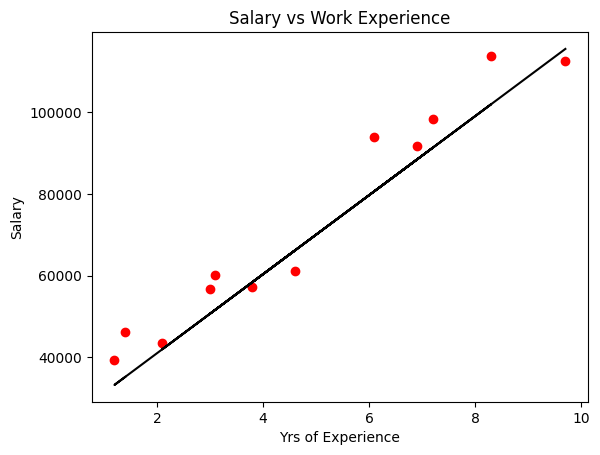

In [78]:
plt.scatter(X_test , Y_test , color='red')
plt.plot(X_test , test_data_prediction , color='black')
plt.xlabel('Yrs of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Work Experience')
plt.show()
